# Linear Regression by Computation

### importing libraries

In [51]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sn

In [87]:
os.getcwd()
%ls

 Volume in drive C is OS
 Volume Serial Number is 7CC1-D156

 Directory of C:\Users\Asus\Documents\DSc_Assignment\Assignment_3.1

01/31/2022  11:53 AM    <DIR>          .
01/31/2022  10:09 AM    <DIR>          ..
01/31/2022  11:48 AM    <DIR>          .ipynb_checkpoints
01/31/2022  11:36 AM            60,019 Assignment_3.1_1.ipynb
01/31/2022  11:52 AM             2,101 Assignment_3.1_2.ipynb
01/31/2022  11:53 AM            49,082 housing.csv
01/31/2022  10:13 AM               454 Salary_Data.csv
               4 File(s)        111,656 bytes
               3 Dir(s)  41,544,753,152 bytes free


### import the dataset

In [104]:
Dataset = pd.read_csv("Salary_Data.csv")
Dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Assign values to independent and dependent variables : x is the independent variable and y is the dependent variable

In [19]:
x = Dataset["YearsExperience"].to_numpy()
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [20]:
y = Dataset["Salary"].to_numpy()
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Print the first few rows

In [23]:
print(Dataset.head(random.randint(0,len(Dataset))))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0


### Separate dataset in 80-20 split 

In [33]:
###shuffling the dataset for IID
Dataset = Dataset.sample(frac=1).reset_index(drop=True)
Dataset

,YearsExperience,Salary
0,10.5,121872.0
1,9.0,105582.0
2,4.9,67938.0
3,2.0,43525.0
4,9.6,112635.0
5,6.8,91738.0
6,8.7,109431.0
7,4.0,56957.0
8,2.9,56642.0
9,6.0,93940.0


In [34]:
mark = int(0.8*len(Dataset))
mark

24

In [35]:
train_data = Dataset.head(mark)
train_data

,YearsExperience,Salary
0,10.5,121872.0
1,9.0,105582.0
2,4.9,67938.0
3,2.0,43525.0
4,9.6,112635.0
5,6.8,91738.0
6,8.7,109431.0
7,4.0,56957.0
8,2.9,56642.0
9,6.0,93940.0


In [36]:
test_data = Dataset.tail(len(Dataset)-mark)
test_data

,YearsExperience,Salary
24,5.9,81363.0
25,4.0,55794.0
26,1.5,37731.0
27,1.1,39343.0
28,7.1,98273.0
29,8.2,113812.0


### Segregating in dependent and independent variable from train and test set

In [41]:
train_x = train_data["YearsExperience"]
train_y = train_data["Salary"]

In [42]:
test_x = test_data["YearsExperience"]
test_y = test_data["Salary"]

### Plot the training dataset

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

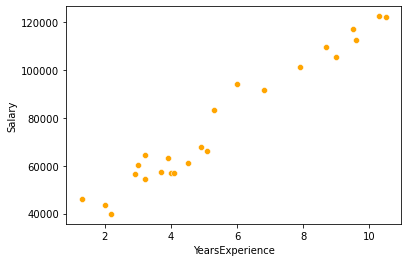

In [56]:
sn.scatterplot(x = train_x, y = train_y, color = "orange")

### Compute the Slope
#### we know slope = covarience(x,y)/varience(x)

In [83]:
slope = sum((train_x - np.mean(train_x)) * (train_y - np.mean(train_y))) / sum( (train_x - np.mean(train_x))**2 )
print("The calculated slope is : ",slope)

The calculated slope is :  9215.28221493261


### Compute the Intercept
#### intercept = mean(y) - slope*(mean(x))

In [82]:
intercept = np.mean(train_y) - slope*(np.mean(train_x))
print("The calculated intercept is : ",intercept)

The calculated intercept is :  26710.11918811952


### Plotting the regression line

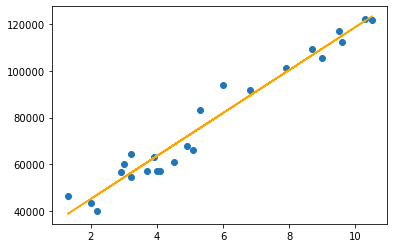

In [72]:
%matplotlib inline
plt.scatter(train_x, train_y)
y_pred = intercept + slope*train_x
plt.plot(train_x,y_pred,color = 'orange')

### Predict the values upon test data

In [76]:
pred_y = intercept + slope*test_x
print(pred_y)

24     81080.284256
25     63571.248048
26     40533.042511
27     36846.929625
28     92138.622914
29    102275.433351
Name: YearsExperience, dtype: float64


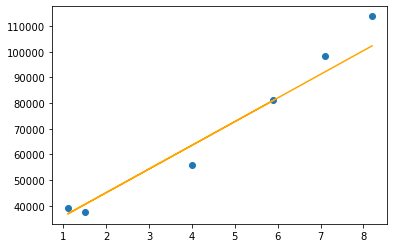

In [86]:
%matplotlib inline
plt.scatter(test_x, test_y)
plt.plot(test_x,pred_y,color = 'orange')

### Error Calculation over test data 

In [81]:
MSE = np.sqrt(np.sum(np.square(test_y-pred_y)))
print("The mean squared root error on test data is : ", MSE)

The mean squared root error on test data is :  15664.299448997506
